Problem Statement:Find	out	the	supply	demand	gap	and	suggest	way	to	improve	the	situation during Morning Rush hours (5 to 10) and Evening Rush hours(17 to 22) which has mainly pickup and Drop from City to Airport and vice versa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Uber Request Data.csv")

In [2]:
df = pd.read_csv("Uber Request Data.csv")
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [3]:
# make sure that number of duplicate rows are zero
df = df.drop_duplicates()
sum(df.duplicated(subset = "Request id")) == 0
df.set_index(['Request id'],inplace=True)

**let's look at the dimensions of the dataframe**

In [4]:
df.shape

(6745, 5)

**checking the % of NAs columnwise**

In [5]:
df.isnull().sum()*100/df.shape[0] 

Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 619 to 6753
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pickup point       6745 non-null   object 
 1   Driver id          4095 non-null   float64
 2   Status             6745 non-null   object 
 3   Request timestamp  6745 non-null   object 
 4   Drop timestamp     2831 non-null   object 
dtypes: float64(1), object(4)
memory usage: 316.2+ KB


#### Derive new columns from timestamp values such as Hour and Day

In [7]:
# extract the hour from the request time
req_hour = pd.to_datetime(df["Request timestamp"]).dt.hour
req_hour.head()
req_hour.value_counts()
df["req_hour"] = req_hour

In [8]:
#extract the day from the request time
req_day = pd.to_datetime(df["Request timestamp"]).dt.day_name()
req_day.head()
req_day.value_counts()
df["req_day"] = req_day

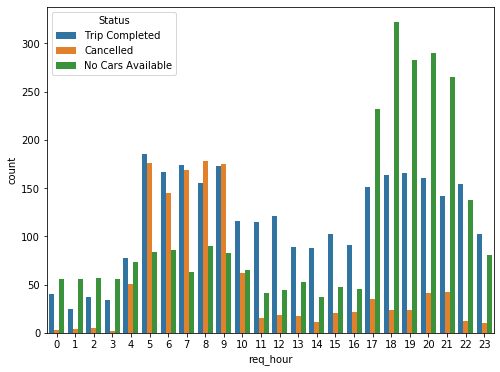

In [9]:
# factor plot of hour and day w.r.t. status
plt.figure(figsize=(8,6))
sns.countplot(df['req_hour'], hue = "Status", data = df)

 - It is noted that More number of bookings are received in morning 5 to 10 and evening 17 to 22.
 - Morning there are more cancellations.
 - Evening there no cars available for booking

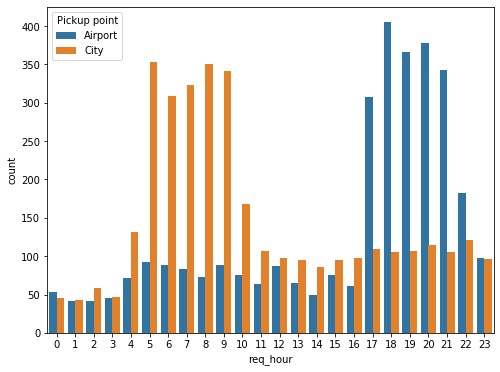

In [10]:
# factor plot of hour and day w.r.t. pickup point
plt.figure(figsize=(8,6))
sns.countplot(df['req_hour'], hue = "Pickup point", data = df)

- Morning there are more cancellations when pickup is from city.
- Evening there no cars available when pickup is from airport.

### creating a time slot for various time period of day

In [11]:
# creating a time slot for various time period of day
def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"

df['time_slot'] = df.req_hour.apply(lambda x: time_period(x))

In [12]:
df.time_slot.value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: time_slot, dtype: int64

#### Lets only concentrate on Morning and Evening Rush hours where there are more cancellations and no cars available.

In [13]:
df_morning_rush = df[df.time_slot == "Morning_Rush"]
df_evening_rush = df[df.time_slot == "Evening_Rush"]

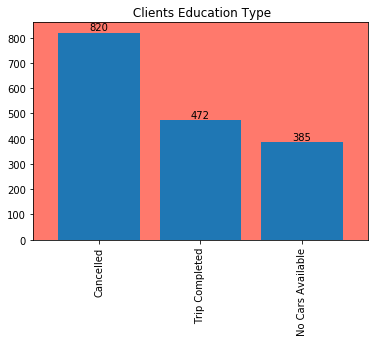

In [14]:
plt.figure(figsize=(6,4))
df_city = df.loc[(df["Pickup point"] == "City") & (df.time_slot == "Morning_Rush")]
df_city_count = df_city.Status.value_counts()
ax = df_city_count .plot.bar(width=0.8)
ax.set_title(" Clients Education Type")
ax.set_facecolor('xkcd:salmon')
for i, v in df_city_count.reset_index().iterrows():
    ax.text(i, v.Status + 10 , v.Status, color='black', ha='center', va='baseline')

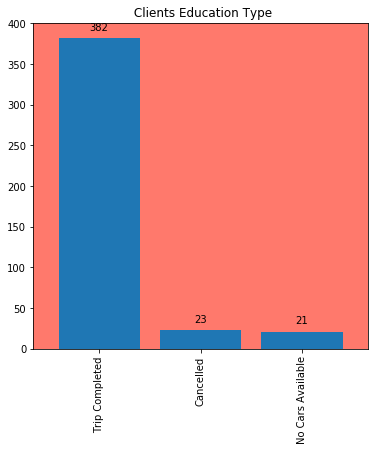

In [15]:
plt.figure(figsize=(6,6))
df_city = df.loc[(df["Pickup point"] == "Airport") & (df.time_slot == "Morning_Rush")]
df_city_count = df_city.Status.value_counts()
ax = df_city_count .plot.bar(width=0.8)
ax.set_title(" Clients Education Type")
ax.set_facecolor('xkcd:salmon')
for i, v in df_city_count.reset_index().iterrows():
    ax.text(i, v.Status + 10 , v.Status, color='black', ha='center', va='baseline')

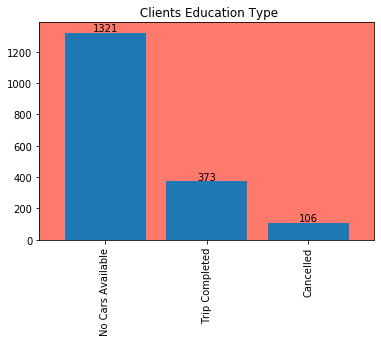

In [16]:
plt.figure(figsize=(6,4))
df_city = df.loc[(df["Pickup point"] == "Airport") & (df.time_slot == "Evening_Rush")]
df_city_count = df_city.Status.value_counts()
ax = df_city_count .plot.bar(width=0.8)
ax.set_title(" Clients Education Type")
ax.set_facecolor('xkcd:salmon')
for i, v in df_city_count.reset_index().iterrows():
    ax.text(i, v.Status + 10 , v.Status, color='black', ha='center', va='baseline')

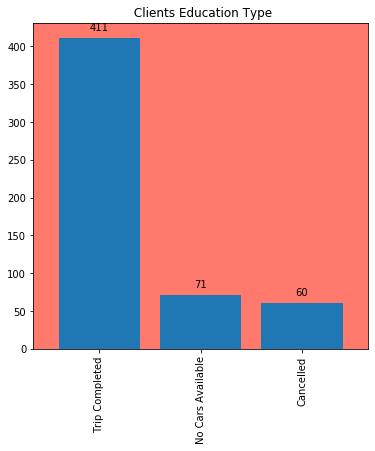

In [17]:
plt.figure(figsize=(6,6))
df_city = df.loc[(df["Pickup point"] == "City") & (df.time_slot == "Evening_Rush")]
df_city_count = df_city.Status.value_counts()
ax = df_city_count .plot.bar(width=0.8)
ax.set_title(" Clients Education Type")
ax.set_facecolor('xkcd:salmon')
for i, v in df_city_count.reset_index().iterrows():
    ax.text(i, v.Status + 10 , v.Status, color='black', ha='center', va='baseline')

### Final Inferences on the Supply and Demand Gap of Uber Car Services.

#### Morning Rush Hours from 5 to 10.
 - Total Number of pickups from City to Airport in Morning rush hours is 1677.
 - Uber services have 820 number of cancellations in morning rush hours that has pickup from City to Airport.
 - The supply from the city	is 472, while the demand is	1677.	
 - The difference between the demand and the supply	is	1205.
 - Total Number of pickups from Airport to City in Morning rush hours is 426.
 - Uber services have 382 number of trips as completed in morning rush hours that has pickup from Airport to City.

#### Evening Rush Hours from 17 to 22.
 - Total Number of pickups from Airport to City in Evening rush hours is 1800.
 - Uber services have 1321 number of 'No Cars Available' in evening rush hours that has pickup from Airport to City.
 - The supply from the Airport is 373, while the demand is	1800.	
 - The difference between the demand and the supply	is	1427.
 - Total Number of pickups from City to Airport in Evening rush hours is 542.
 - Uber services have 411 number of trips completed in evening rush hours that has pickup from City to Airport.


### Recommendations:

#### For	the	trips	in	the	morning,	drivers	can	be	incentivised	to	make	those	trips.	
1. They	could	be	given	a	bonus	for	each	trip	they	complete	from	the	city	to	the	airport	in	the	morning	rush.	This	will	ensure	that	less	number	of	trips	are	cancelled.
2. Uber	can	pay	for	the	gas	mileage	of	drivers	to	come	back	to	the	city	without	a	ride.
3. Uber	can	increase	the	demand	at	the	airport	to	reduce	idle	time	– by	increased	marketing	and	price cuts	for	the	passengers

#### For	the	evening,	since	the	number	of	drivers	is	less,	some	of	the	ways	are:

1. Drivers	can	again	be	given	a	bonus	to	complete	a	trip	from	the	airport	in	the	evening.	This	will ensure that	the	supply	increases	at	the	airport.	
2. Uber	can	also	pay	drivers	to	come	without	a	passenger	to	the	airport
3. Another	innovative	way	can	be	to	pool	the	rides	of	passengers	so	that	lesser	number	of	cars	can	serve	more	passengers.